## KD树
K邻近算法最简单粗暴的方法是，线性扫描.通过计算输入样本与每个训练样本的距离.来找出最近邻的K个训练样本.

当训练集过大的时候，计算非常耗时，常用的解决方法是使用kd树，他可以大幅度的提高k近邻搜索的效率。

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors,datasets,cross_validation

In [6]:
#loaddata
def load_classification_data():
    digits = datasets.load_digits()
    X_train = digits.data
    y_train = digits.target
    return cross_validation.train_test_split(X_train,y_train,test_size=0.25,random_state=0,stratify=y_train)
    

In [7]:
def create_regression_data(n):
    X = 5 * np.random.rand(n,1)
    y = np.sin(X).ravel()
    y[::5] += 1 * (0.5 - np.random.rand(int(n/5)))
    return cross_validation.train_test_split(X,y,test_size = 0.25,random_state=0)

In [8]:
def test_KNeighorsClassifier(*data):
    X_train,X_test,y_train,y_test = data
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train,y_train)
    print('Training Score:%f'%clf.score(X_train,y_train))
    print('Testing Score %f'%clf.score(X_test,y_test))

In [9]:
X_train,X_test,y_train,y_test = load_classification_data()
test_KNeighorsClassifier(X_train,X_test,y_train,y_test)

Training Score:0.991091
Testing Score 0.980000


考察K值以及投票策略对于预测性能的影响，给出测试函数

In [11]:
def test_KNeighborsClassfier_k_w(*data):
    X_train,X_test,y_train,y_test = data
    Ks = np.linspace(1,y_train.size,num=100,endpoint=False,dtype='int')
    weights = ['uniform','distance']
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf = neighbors.KNeighborsClassifier(weights=weight,n_neighbors=K)
            clf.fit(X_train,y_train)
            testing_scores.append(clf.score(X_test,y_test))
            training_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label='testing score:weight=%s'%weight)
        ax.plot(Ks,training_scores,label='training score:weight=%s'%weight)
    ax.legend(loc='best')
    ax.set_xlabel('K')
    ax.set_ylabel('score')
    ax.set_ylim(0,1.05)
    ax.set_title('KneigborsClassifer')
    plt.show()

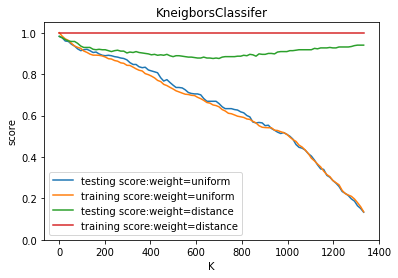

In [14]:
test_KNeighborsClassfier_k_w(X_train,X_test,y_train,y_test)

考察P值（即距离函数的形式）对于预测性能的影响

In [17]:
def test_KneiborsClassifer_k_p(*data):
    X_train,X_test,y_train,y_test = data
    Ks = np.linspace(1,y_train.size,endpoint=False,dtype='int')
    Ps=[1,2,10]
    
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)
    for P in Ps:
        training_scores=[]
        testing_scores = []
        for K in Ks:
            clf = neighbors.KNeighborsClassifier(p=P,n_neighbors=K)
            clf.fit(X_train,y_train)
            testing_scores.append(clf.score(X_test,y_test))
            training_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label='testing score:p=%d'%P)
        ax.plot(Ks,training_scores,label='training score:p=%s'%P)
    ax.legend(loc='best')
    ax.set_xlabel('K')
    ax.set_ylabel('score')
    ax.set_ylim(0,1.05)
    ax.set_title('KneigborsClassifer')
    plt.show()
        

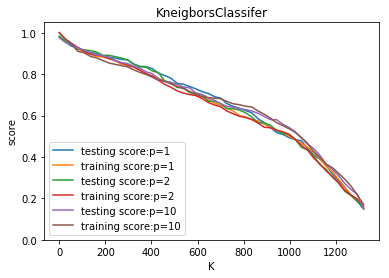

In [18]:
test_KneiborsClassifer_k_p(X_train,X_test,y_train,y_test)